In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/Demo_Projects/CatsAndDogs/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Demo_Projects/CatsAndDogs')

local_zip = '/content/drive/MyDrive/Demo_Projects/CatsAndDogs/test1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Demo_Projects/CatsAndDogs')   
      
zip_ref.close()

In [ ]:
import os

train_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/train')

test_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/test1')


In [ ]:
train_names = os.listdir(train_dir)
print(train_names[:10])

test_names = os.listdir(test_dir)
print(test_names[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg']


In [ ]:
filenames = os.listdir(train_dir)
categories = []
for image in filenames :
    category = image.split('.')[0]
    if category == 'dog' :
        categories.append(1)
    else :    
        categories.append(0)

In [ ]:
import pandas as pd
df = pd.DataFrame({'filename' : filenames, 'category' : categories})
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [ ]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


In [ ]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as nps
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

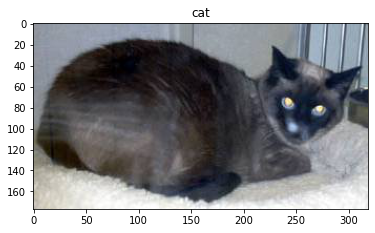

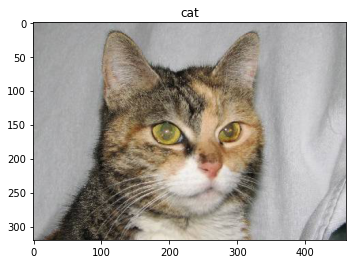

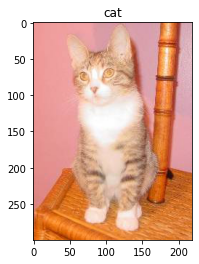

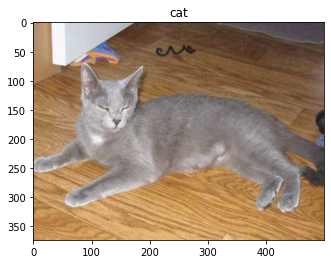

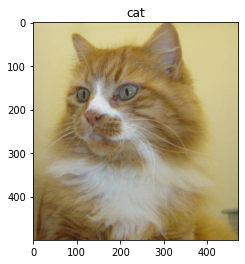

In [ ]:
for i in range(5) :
    sample = filenames[i+10]
    image = tf.keras.preprocessing.image.load_img(train_dir+'/' + sample)
    plt.imshow(image)
    plt.title('dog' if categories[i+10]==1 else 'cat')
    plt.show()

In [ ]:
#model 
model = keras.models.Sequential()

##  Conv_1
model.add(keras.layers.Conv2D(32, 3,input_shape = [128, 128, 3], activation = 'relu', padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

## Conv_2
model.add(keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

## Conv_3
model.add(keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

## Conv_4
model.add(keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

## Flatten
model.add(keras.layers.Flatten())

## fc_1
model.add(keras.layers.Dense(1024, activation = 'relu'))
model.add(keras.layers.Dropout(0.25))

## fc_2
model.add(keras.layers.Dense(2, activation = 'sigmoid'))

## optimizer and loss
#optimizer = keras.optimizers.RMSprop(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [ ]:
earlystop = keras.callbacks.EarlyStopping(patience=10)
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df['category'] = df['category'].map({0 : 'cat', 1 : 'dog'})

In [ ]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
total_train = train_df.shape[0]
total_valid = valid_df.shape[0]
batch_size = 10

In [ ]:
train_data = keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                         rescale = 1./255,
                                                         horizontal_flip=True)
train_generator = train_data.flow_from_dataframe(train_df,
                                                './train/',
                                                x_col = 'filename',
                                                y_col = 'category',
                                                target_size=[128,128],
                                                class_mode='categorical',
                                                batch_size=batch_size)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 20000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
valid_data = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
                                                         
                                                         
valid_generator = valid_data.flow_from_dataframe(valid_df,
                                                './train/',
                                                x_col = 'filename',
                                                y_col = 'category',
                                                target_size=[128,128],
                                                class_mode='categorical',
                                                batch_size=batch_size)

Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
epochs = 30
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=total_valid//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=len(valid_generator.filenames) // batch_size,
    callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored